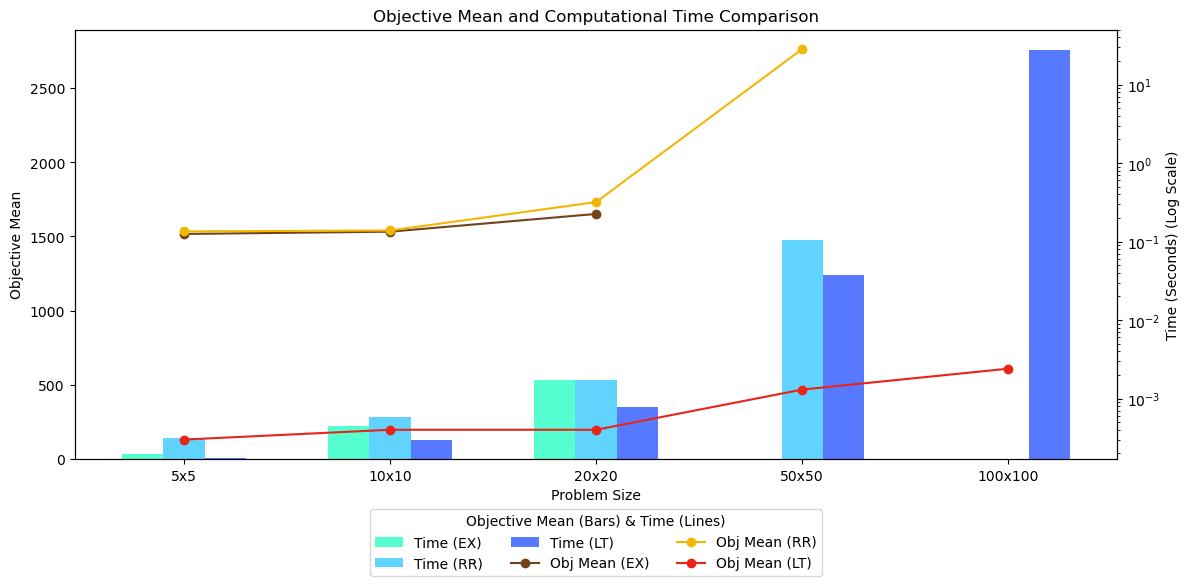

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
methods = ['EX', 'RR', 'LT']
sizes = ['5x5', '10x10', '20x20', '50x50', '100x100']

# Objective Mean
obj_mean_values = {
    'EX': [32.41, 220.97, 530.90, None, None],
    'RR': [141.34, 284.39, 531.69, 1478.88, None],
    'LT': [9.36, 128.53, 350.68, 1242.68, 2756.08]
}

# Computational Time (Sec)
time_values = {
    'EX': [0.1249, 0.1335, 0.2247, None, None],
    'RR': [0.1347, 0.1383, 0.3181, 28.2658, None],
    'LT': [0.0003, 0.0004, 0.0004, 0.0013, 0.0024]
}

# Plot without gridlines
fig, ax1 = plt.subplots(figsize=(12, 6))


width = 0.2  # Bar width for the column chart
x_indexes = np.arange(len(sizes))

# Adjust bar colors to shades of blue
bar_colors = ['#0FFFBD', '#1CC1FF', '#0F40FF']
bar_handles = []
for i, (method, values) in enumerate(obj_mean_values.items()):
    bar = ax1.bar(
        x_indexes + i * width - width,  # Adjust position for each method
        [v if v is not None else 0 for v in values],
        width=width,
        label=f"Obj Mean ({method})",
        color=bar_colors[i],
        alpha=0.7,  # Make bars slightly transparent
        zorder=1  # Ensure bars have a lower zorder
    )
    bar_handles.append(bar[0])

ax1.set_ylabel('Objective Mean')
ax1.set_xlabel('Problem Size')
ax1.set_title('Objective Mean and Computational Time Comparison')




# Add a secondary y-axis for the Objective Mean values
ax2 = ax1.twinx()

# Define colors for line charts (shades of red and orange)
line_colors = ['#734319', '#F2B705', '#EB2315']

# Plot computational time on the primary axis (log scale)
line_handles = []
for i, (method, values) in enumerate(time_values.items()):
    line, = ax2.plot(
        sizes,
        [v if v is not None else np.nan for v in values],
        marker='o',
        label=f"Time ({method})",
        color=line_colors[i],
        zorder=4  # Ensure lines have a higher zorder
    )
    line_handles.append(line)

    
ax2.set_yscale('log')
ax2.set_ylabel('Time (Seconds) (Log Scale)')


# Set x-axis labels
ax1.set_xticks(x_indexes)
ax1.set_xticklabels(sizes)

# Combine line and bar legends into one
handles = bar_handles + line_handles
labels = [f"Time ({method})" for method in time_values.keys()] + [f"Obj Mean ({method})" for method in obj_mean_values.keys()]

plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, title='Objective Mean (Bars) & Time (Lines)')

plt.tight_layout()
plt.show()
